<a href="https://colab.research.google.com/github/jiwoo-colab/modeling/blob/main/CO2_%ED%8F%AC%EC%A7%91%EB%9F%89_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


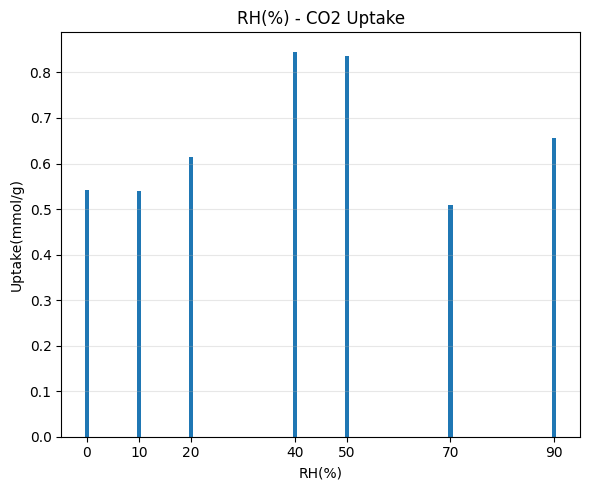

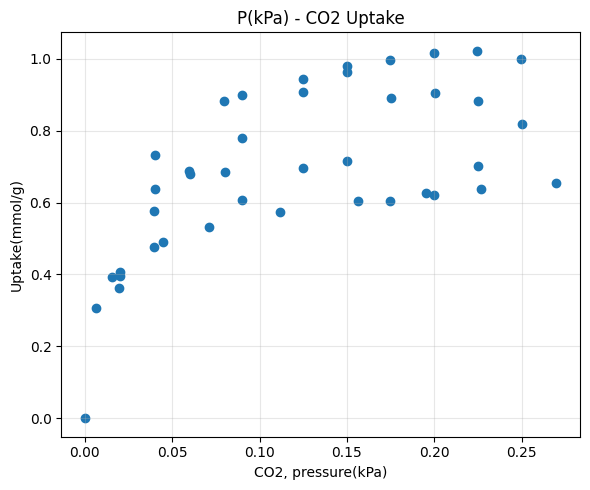

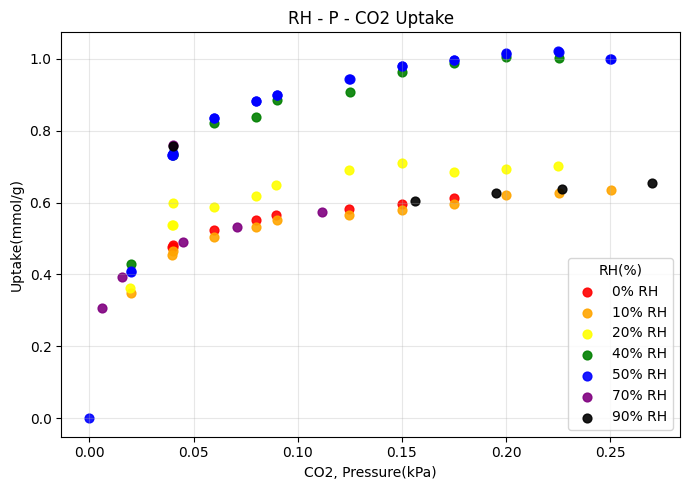

In [ ]:
import pandas as pd                                                             #pandas:CSV같은 표 형태 데이터를 읽고 관리
import matplotlib.pyplot as plt                                                 #matplotlib.pyplot: 그래프 시각화 라이브러리

from google.colab import drive                                                  #colab에서 google drive 파일을 접근하기 위한 모듈


#------------함수정의------------------------------------

#함수1-CO2데이터 읽기
def read_co2_data(file_path: str) -> pd.DataFrame:
  df = pd.read_csv(file_path)

  return df

#함수2-RH별 평균 Uptake 막대 그래프
def plot_rh_bar(df):
  grouped = df.groupby("RH_percent")["Uptake"].mean().reset_index()             #RH별로 묶어서 평균만 사용

  plt.figure(figsize=(6, 5))
  plt.bar(grouped["RH_percent"], grouped["Uptake"])

  plt.title("RH(%) - CO2 Uptake")
  plt.xlabel("RH(%)")
  plt.ylabel("Uptake(mmol/g)")

  plt.xticks(grouped["RH_percent"])
  plt.grid(axis="y", alpha=0.3)                                                 #Y축 방향으로만 grid
  plt.tight_layout()
  plt.show

#함수3-압력별 평균 Uptake 산점도
def plot_p_scatter(df):

  grouped = df.groupby("P")["Uptake"].mean().reset_index()
  grouped = grouped.sort_values("P")

  plt.figure(figsize=(6, 5))
  plt.scatter(grouped["P"], grouped["Uptake"])

  plt.title("P(kPa) - CO2 Uptake")
  plt.xlabel("CO2, pressure(kPa)")
  plt.ylabel("Uptake(mmol/g)")
  plt.grid(True, alpha=0.3)                                                     #grid 전체
  plt.tight_layout()
  plt.show()

#함수4-RH별 pressure-uptake 산점도
def plot_rh_p_scatter(df):

  plt.figure(figsize=(7, 5))

  rh_list = sorted(df["RH_percent"].unique())

  colors = ["red", "orange", "yellow", "green", "blue", "purple", "black"]

  for i, rh in enumerate(rh_list):
    sub = df[df["RH_percent"] == rh].copy()
    sub = sub.sort_values("P")

    c = colors[i % len(colors)]

    plt.scatter(sub["P"], sub["Uptake"], label=f"{int(rh)}% RH", s=40, alpha=0.9, color=c)

  plt.title("RH - P - CO2 Uptake")
  plt.xlabel("CO2, Pressure(kPa)")
  plt.ylabel("Uptake(mmol/g)")

  plt.grid(True, alpha=0.3)
  plt.legend(title="RH(%)")
  plt.tight_layout()
  plt.show()


#colab에서 드라이브 연결
drive.mount('/content/drive')

#파일 경로 설정
file_path = '/content/drive/MyDrive/CO2_data_v2.csv'

#실행
#(1) 데이터 읽기
df = read_co2_data(file_path)
#(2) RH-Uptake 막대그래프
plot_rh_bar(df)
#(3) P-Uptake 산점도
plot_p_scatter(df)
#(4) RH-P-Uptake 산점도
plot_rh_p_scatter(df)
